In [1]:
from datasets import Dataset, DatasetDict
import ast
from tqdm import tqdm
import pandas as pd
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Seaborn settings
sns.set_context("notebook")
sns.set_palette("colorblind")
sns.color_palette("pastel")

/home/hua2bv/miniconda3/envs/unlearning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [2]:
import wandb
api = wandb.Api()

In [3]:
# project_names = ["Composable_Interventions", "AK_Tests"]
project_names = ["kyledevinobrien1/Composable_Interventions"]
all_runs_frame = None
for project_name in project_names:
    runs = api.runs(project_name)
    for run in tqdm(runs, desc=f"Loading runs for project: {project_name}"):
        if run.state != "finished":
            continue
        
        if "hparam_search" not in run.config["tag"].lower():
            continue

        try:
            run_start_datetime = datetime.fromtimestamp(run.summary_metrics["_timestamp"])
            start_cutoff = datetime.strptime("2024-05-20 12:00:00", "%Y-%m-%d %H:%M:%S")
            if run_start_datetime > start_cutoff:
                continue

            config_frame = pd.DataFrame([run.config])
            summary_frame = pd.DataFrame([run.summary_metrics])
            combined_frame = pd.concat([config_frame, summary_frame], axis=1)
            if all_runs_frame is None:
                all_runs_frame = combined_frame
            else:
                all_runs_frame = pd.concat([all_runs_frame, combined_frame])
        except:
            print(f"Failed to load run {run.id}")
            continue

    all_runs_frame = all_runs_frame.sort_values("_timestamp", ascending=False)
    for column in all_runs_frame.columns:
        all_runs_frame[column] = all_runs_frame[column].apply(lambda x: str(x) if isinstance(x, dict) or isinstance(x, list) else x)

all_runs_frame

Loading runs for project: kyledevinobrien1/Composable_Interventions:  76%|███████▋  | 5370/7021 [00:45<00:11, 147.51it/s]

Failed to load run 7pl5w8jc
Failed to load run fwh561ll
Failed to load run 5lcvzqt7
Failed to load run x2b7lxp4
Failed to load run rntucryr
Failed to load run wph2ex78
Failed to load run mmq3ss2i
Failed to load run zt0yugep
Failed to load run ws80niuu
Failed to load run tnacq74y
Failed to load run nlyv3i0v
Failed to load run n4z5an7w
Failed to load run lwvdnl4q
Failed to load run bzc13vup
Failed to load run 5f1w70r5
Failed to load run gp2ll0lc
Failed to load run 4io12akb
Failed to load run iadq5oep
Failed to load run riqqjgwh
Failed to load run ux5v1wpw


Loading runs for project: kyledevinobrien1/Composable_Interventions: 100%|██████████| 7021/7021 [01:03<00:00, 110.56it/s]


,sym,tag,edit,save,seed,v_lr,model,wandb,wbits,device,...,wmdp_bio_stderr,wmdp_cyber accuracy,Latency,wmdp_bio,Average bits,Locality,PPL,_step,wmdp_bio stderr,rmu_steering_coeff_list
0,True,hparam_search,False,out/,42,0.5,meta-llama/Meta-Llama-3-8B,online,4,0,...,0.012074,0.259688,94.915829,0.245876,16,0.023369,6.370400,1,0.012074,NaN
0,True,hparam_search,False,out/,42,0.5,meta-llama/Meta-Llama-3-8B,online,4,0,...,0.012074,0.259688,95.059794,0.245876,16,0.026110,6.370400,1,0.012074,NaN
0,True,hparam_search,False,out/,42,0.5,meta-llama/Meta-Llama-3-8B,online,4,0,...,0.012074,0.259688,94.681747,0.245876,16,0.025193,6.370400,1,0.012074,NaN
0,True,hparam_search,False,out/,42,0.5,meta-llama/Meta-Llama-3-8B,online,4,0,...,0.012099,0.265727,97.424553,0.247447,16,0.029998,11.389866,1,0.012099,NaN
0,True,hparam_search,False,out/,42,0.5,meta-llama/Meta-Llama-3-8B,online,4,0,...,0.012074,0.259688,94.565713,0.245876,16,0.034143,6.370400,1,0.012074,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,True,hparam_search,False,out/,42,0.5,meta-llama/Meta-Llama-3-8B,online,4,0,...,0.012670,0.442375,95.515500,0.714061,16,0.015669,5.540318,0,0.012670,"[20, 20]"
0,True,hparam_search,False,out/,42,0.5,meta-llama/Meta-Llama-3-8B,online,4,0,...,0.012670,0.442375,119.139339,0.714061,16,0.026762,5.540318,0,0.012670,"[20, 20]"
0,True,hparam_search,False,out/,42,0.5,meta-llama/Meta-Llama-3-8B,online,4,0,...,0.012670,0.442375,97.739977,0.714061,16,0.057404,5.540318,0,0.012670,"[20, 20]"
0,True,hparam_search,False,out/,42,0.5,meta-llama/Meta-Llama-3-8B,online,4,0,...,0.012670,0.442375,96.285923,0.714061,16,0.017509,5.540318,0,0.012670,"[20, 20]"


In [10]:
rmu_columns = ["rmu_alpha", "rmu_layer_id", "rmu_max_num_batches", "mmlu accuracy", "wmdp_bio accuracy", "wmdp_cyber accuracy"]
rmu_data = all_runs_frame[rmu_columns]
rmu_data["rmu_alpha"] = rmu_data["rmu_alpha"].apply(lambda x: ast.literal_eval(x)[0])
rmu_data = rmu_data.sort_values("rmu_layer_id")
rmu_data["mean wmdp accuracy"] = rmu_data[["wmdp_bio accuracy", "wmdp_cyber accuracy"]].mean(axis=1)
rmu_data

/tmp/ipykernel_598729/705529223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmu_data["rmu_alpha"] = rmu_data["rmu_alpha"].apply(lambda x: ast.literal_eval(x)[0])


,rmu_alpha,rmu_layer_id,rmu_max_num_batches,mmlu accuracy,wmdp_bio accuracy,wmdp_cyber accuracy,mean wmdp accuracy
0,1,3,100,0.620709,0.714061,0.442375,0.578218
0,1,3,200,0.620709,0.714061,0.442375,0.578218
0,100,3,200,0.620709,0.714061,0.442375,0.578218
0,100,3,200,0.620709,0.714061,0.442375,0.578218
0,10,3,200,0.620709,0.714061,0.442375,0.578218
...,...,...,...,...,...,...,...
0,1000,9,100,0.620709,0.714061,0.442375,0.578218
0,100,9,100,0.620709,0.714061,0.442375,0.578218
0,100,9,100,0.620709,0.714061,0.442375,0.578218
0,1000,9,100,0.620709,0.714061,0.442375,0.578218


In [11]:
rmu_data[(rmu_data["mean wmdp accuracy"] < .30) & (rmu_data["mmlu accuracy"] > .55)].sort_values("mean wmdp accuracy", ascending=True)

,rmu_alpha,rmu_layer_id,rmu_max_num_batches,mmlu accuracy,wmdp_bio accuracy,wmdp_cyber accuracy,mean wmdp accuracy
0,1000,3,200,0.556046,0.259230,0.264217,0.261724
0,1000,3,200,0.556046,0.259230,0.264217,0.261724
0,1000,3,200,0.556046,0.259230,0.264217,0.261724
0,1000,3,200,0.556046,0.259230,0.264217,0.261724
0,1000,3,200,0.556046,0.259230,0.264217,0.261724
0,1000,3,200,0.556046,0.259230,0.264217,0.261724
0,1000,3,200,0.556046,0.259230,0.264217,0.261724
0,1000,3,200,0.556046,0.259230,0.264217,0.261724
0,1000,3,200,0.556046,0.259230,0.264217,0.261724
0,1000,3,200,0.556046,0.259230,0.264217,0.261724


In [6]:
display(rmu_data.value_counts("rmu_alpha"))

rmu_alpha
1        400
10       393
100      374
1000     360
10000    360
Name: count, dtype: int64

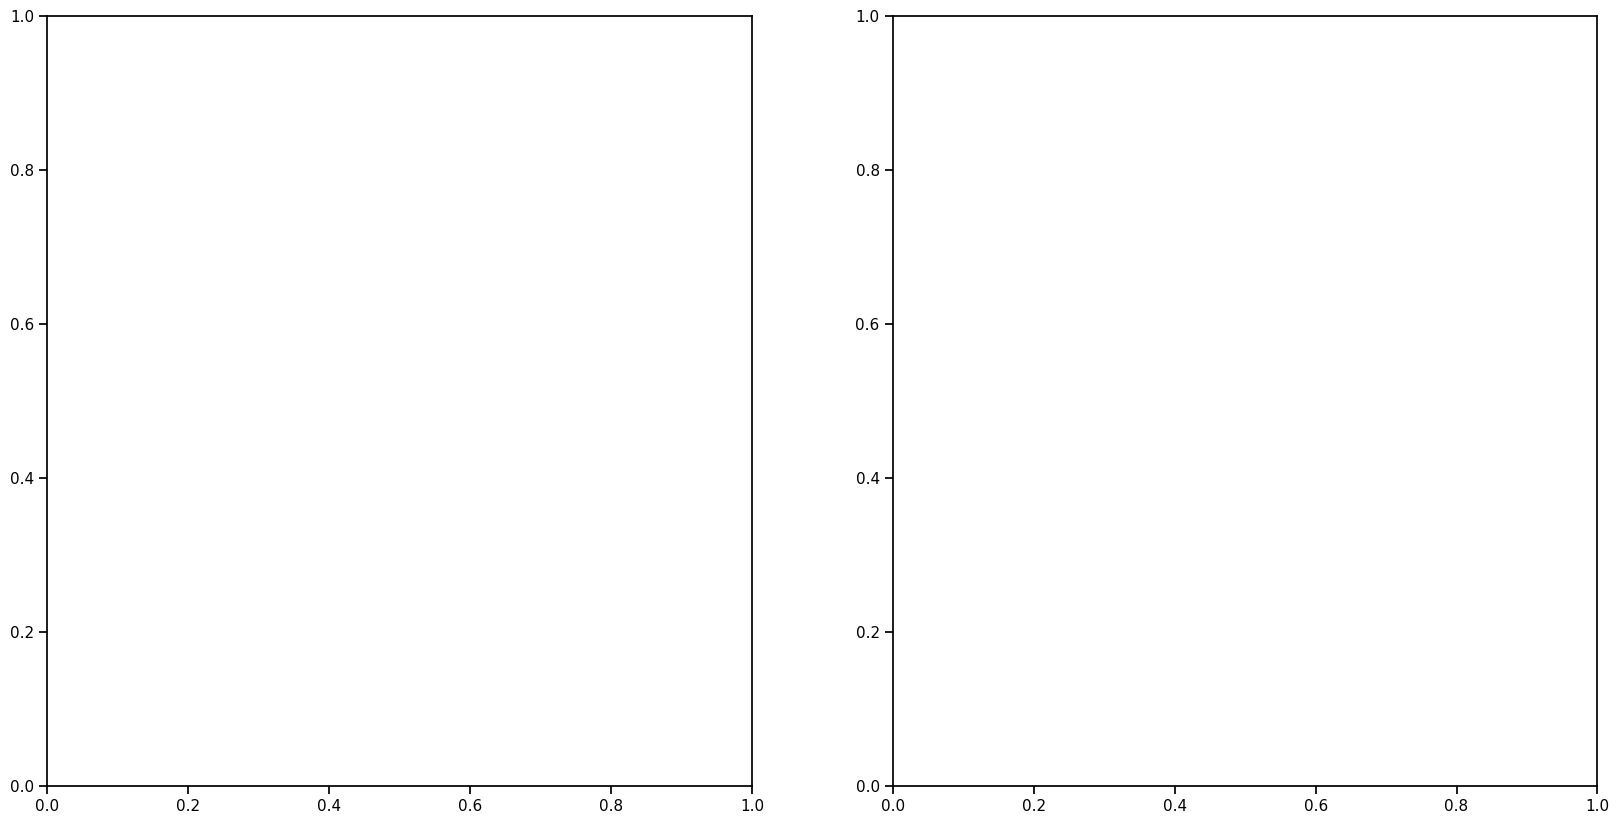

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# line plot where the 